# Linear regression from kaggle
<hr/>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

In [19]:
# import train data and drop na data in the data, get some basig informations
train = pd.read_csv('train.csv').dropna()
print(train.head(), '\n infor:', train.shape, train.columns)

      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984 
 infor: (699, 2) Index(['x', 'y'], dtype='object')


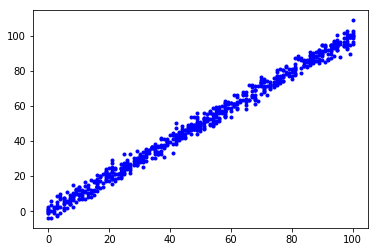

In [26]:
# check the train data to graph using plt 
# looks like good to use linear regression 
plt.scatter(train.x, train['y'], marker='.', color='blue')

## \\(Hypothesis =  y = Wx + b\\)
### using random numbers to W and b, between 1 and 10

In [139]:
a = True
while a:
    W = np.random.choice(11,1)
    b = np.random.choice(11,1)
    
    # we don't want W or b is zero 
    if W and b != 0:
        a = False

In [ ]:
# change train data to matrix
data = train.as_matrix()
data.shape

## \\( cost(W,b) = \frac{1}{m}\sum_{i=1}^{m} (H(x^i) - y^i)^2 \\)


In [160]:
def getcost(W,b,data):
    cost = 0
    for i in range(len(data)):
        x = data[i,0]
        y = data[i,1]
        hypothesis = W*x + b
        cost += (hypothesis - y) ** 2
    
    cost = cost / i+1
    #print(i+1)
    return cost

In [158]:
cost = getcost(W,b,data)
print('cost:', cost, '\nW:', W, '\nb:', b)

cost: [3775.92889224] 
W: [2] 
b: [4]


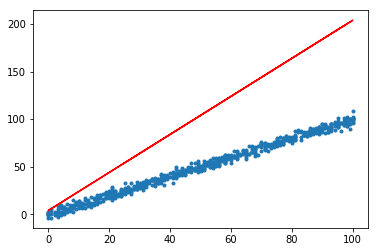

In [156]:
# check hypothesis and origin train data 
plt.scatter(train.x, train.y, marker='.')
plt.plot(train.x, W * train.x + b, color='red')

## \\( cost(W,b) = \frac{1}{2m}\sum_{i=1}^{m} (H(x^i) - y^i)^2 \\)


In [195]:
# get gradient descent using differential

def gradient_descent(W,b,data,learning_rate):
    W_gradient = 0
    b_gradient = 0

    for i in range(len(data)):
        x = data[i,0]
        y = data[i,1]
        
        hypothesis = W * x + b
        
        W_gradient += (2/len(data)) * (x) * (hypothesis - y)
        b_gradient += (2/len(data)) * (hypothesis - y)
        
    new_W = W - (W_gradient * learning_rate)
    new_b = b - (b_gradient * learning_rate)
    return new_W, new_b    
    

In [204]:
nw,nb = gradient_descent(W,b,data,learning_rate=0.0001)

In [205]:
getcost(nw,nb,data)

array([428.16428124])

In [206]:
tem_W = W
tem_b = b
for i in range(2000):
    tem_W, tem_b = gradient_descent(tem_W, tem_b, data, learning_rate=0.0001)
    
print('%.2f    %.2f    %.2f' %(tem_W,tem_b,getcost(tem_W,tem_b,data)))

0.95    3.59    12.32


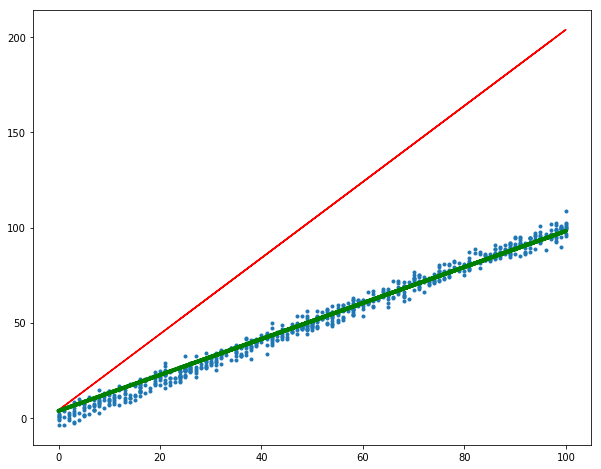

In [225]:
plt.figure(figsize=(10,8))

# origin train data
plt.scatter(train.x.values,train.y.values,marker=".")

# using first W, b values
plt.plot(train.x, (W * train.x) + b, color ="red",)

# after gradient descent
plt.plot(train.x,(tem_W * train.x) + tem_b, color ="green",linewidth='4')